# ML Assignment - 1 - (Bank Marketing Prediction)
## Name: Komal More
### Batch: DSAPR01

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [190]:
df=pd.read_csv('Bank Marketing.csv')

In [191]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


-> Dataset does not contain any missing values

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values? 

In [193]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [194]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

 -> In pdays column more than 75% values are -1
 
 -> pdays means number of days that passed by after the client was last contacted from a previous campaign
    so no. of days cannot be negative so we can remove it

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values? 

In [195]:
df1=df.copy()

In [196]:
df1.drop(df[df['pdays']<0].index,inplace=True)

In [197]:
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000,8257.000000
mean,40.953131,57564.006298,1556.880102,14.289209,260.118687,2.056195,224.577692,3.177546
std,11.425180,31791.407761,3060.593186,7.919176,235.208105,1.561169,115.344035,4.560820
min,18.000000,0.000000,-1884.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.000000,20000.000000,168.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,60000.000000,602.000000,14.000000,193.000000,2.000000,194.000000,2.000000
75%,48.000000,70000.000000,1743.000000,20.000000,324.000000,2.000000,327.000000,4.000000
max,93.000000,120000.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


### Mean & Median

In [198]:
print('Mean=',df1.pdays.mean())
print('Median=',df1.pdays.median())

Mean= 224.57769165556496
Median= 194.0


### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median? 

In [199]:
bal=df1.groupby('education')['balance'].median()

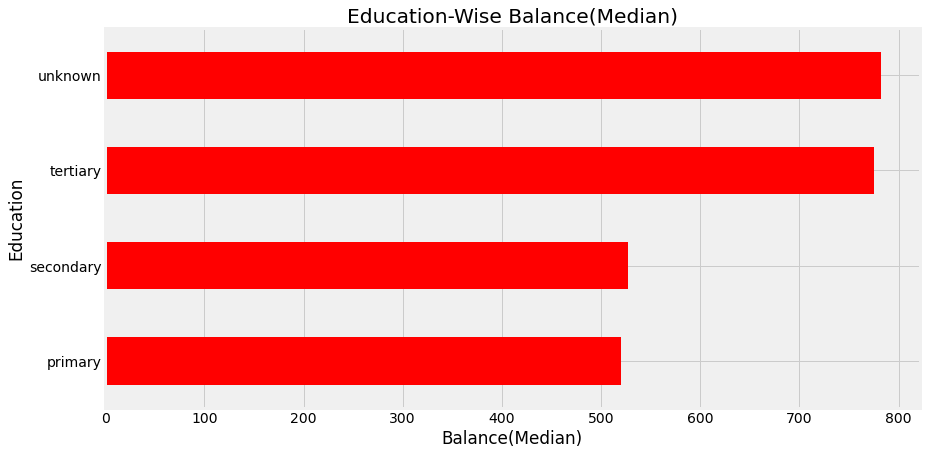

In [200]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
bal.plot.barh(color='r')
plt.title('Education-Wise Balance(Median)')
plt.ylabel('Education')
plt.xlabel('Balance(Median)');

-> tertiary education level has high balance(median)

### Make a box plot for pdays. Do you see any outliers? 

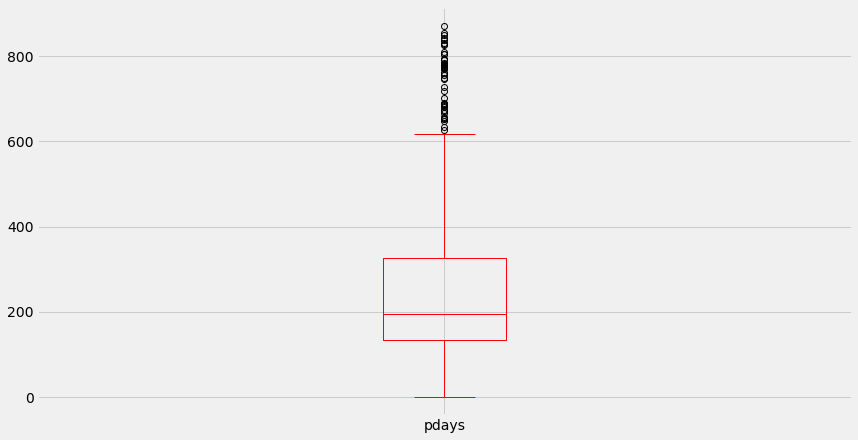

In [201]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
df1['pdays'].plot.box(color='r');

-> There are outliers in pdays column

-> The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The    target variable is “response”. 

-> First, perform bi-variate analysis to identify the features that are directly associated with the target variable. You can      refer to the notebook we used for the EDA discussion

### Bi-Variate Analysis

### Converting the response variable to a convenient form

In [202]:
df1.replace({'response':{'yes':1,'no':0}},inplace=True)

In [203]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

### Make suitable plots for associations with numerical features and categorical features’ 

In [204]:
num_feature=[]
cat_feature=[]
for i in df.columns:
    if df[i].dtypes=='O':
        cat_feature.append(i)
    else:
        num_feature.append(i)

In [205]:
print("Numerical Feature=",num_feature)
print()
print("Categorical Feature=",cat_feature)

Numerical Feature= ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Feature= ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'response']


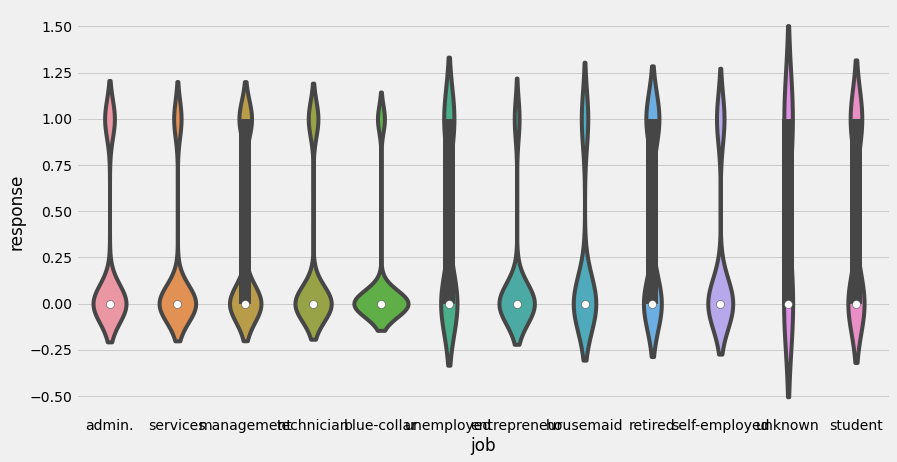

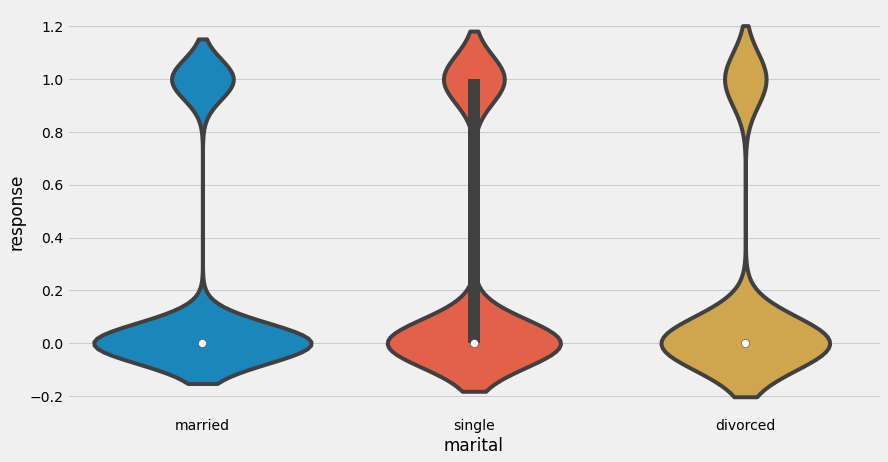

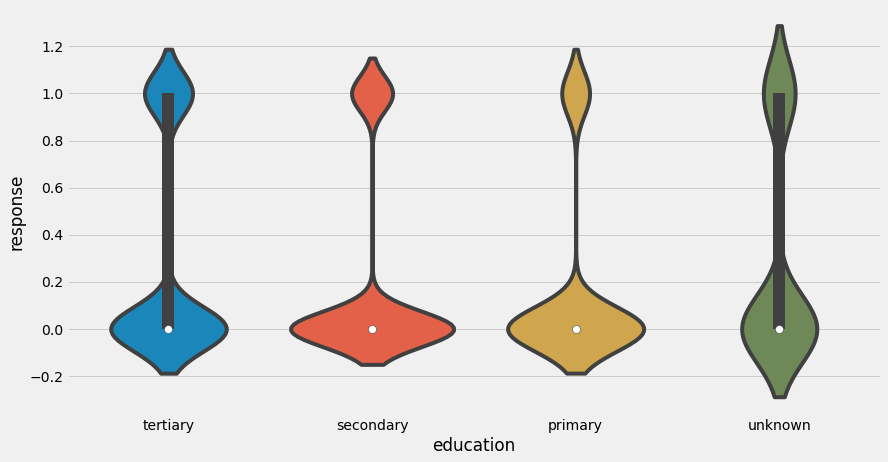

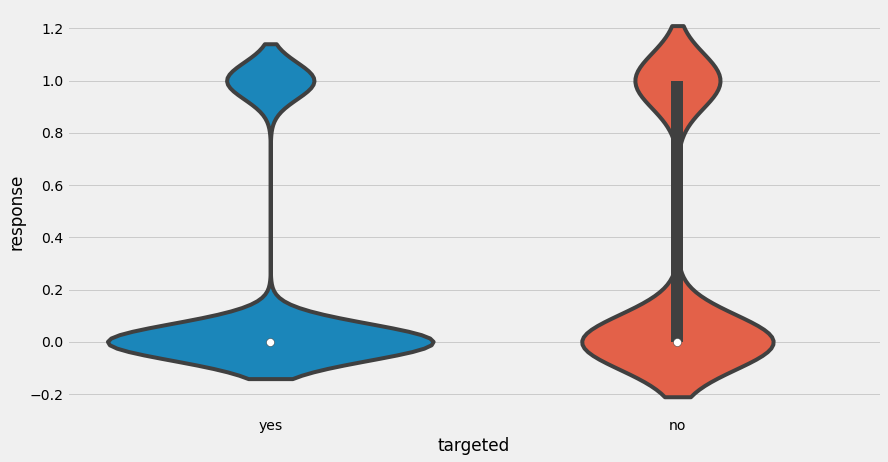

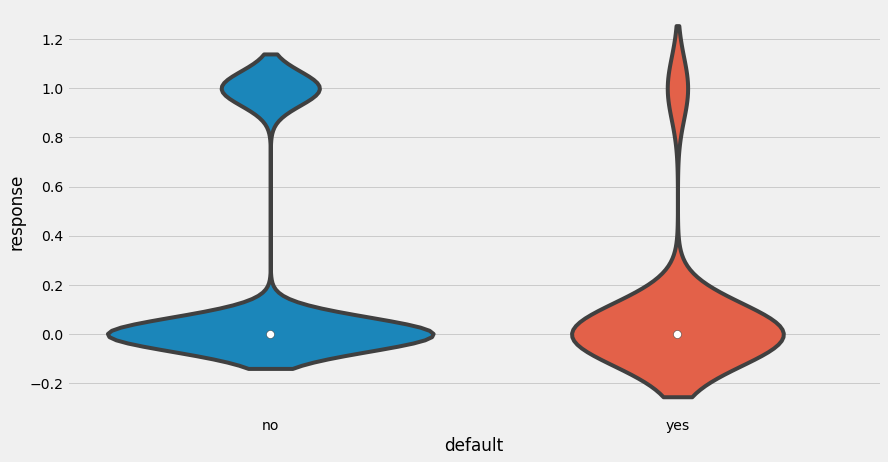

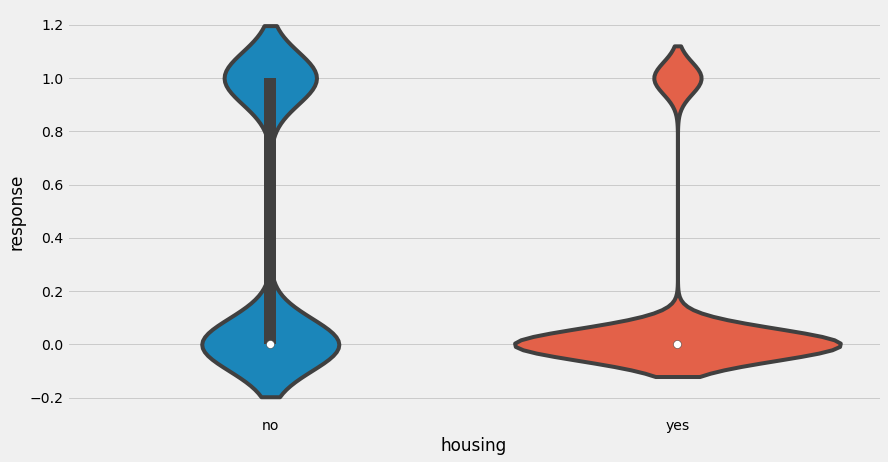

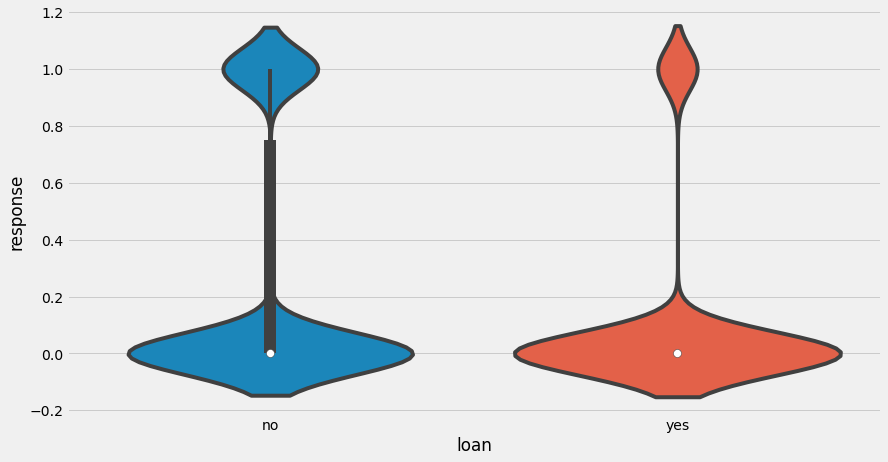

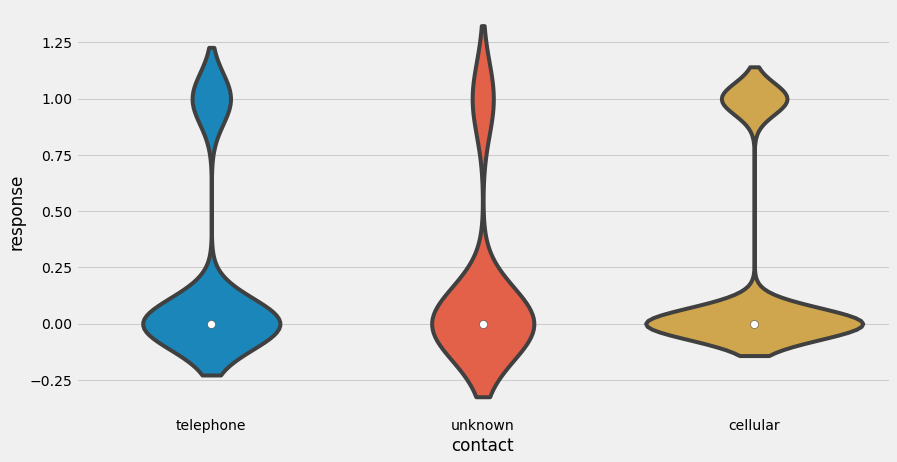

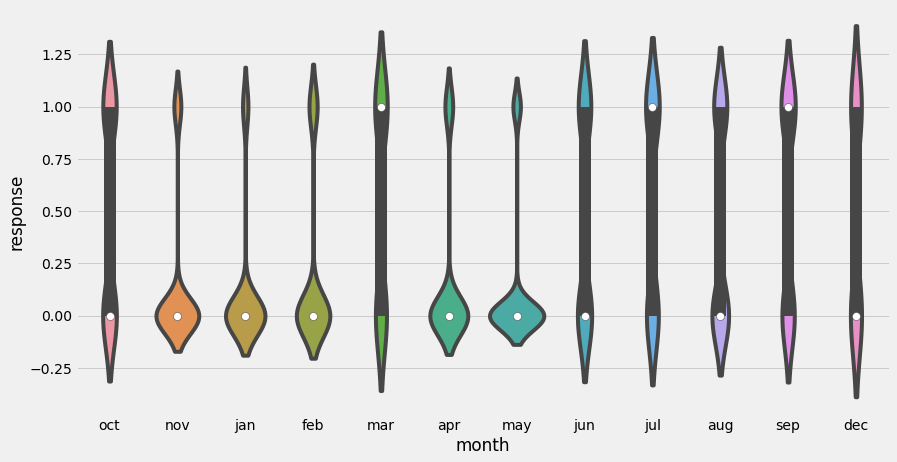

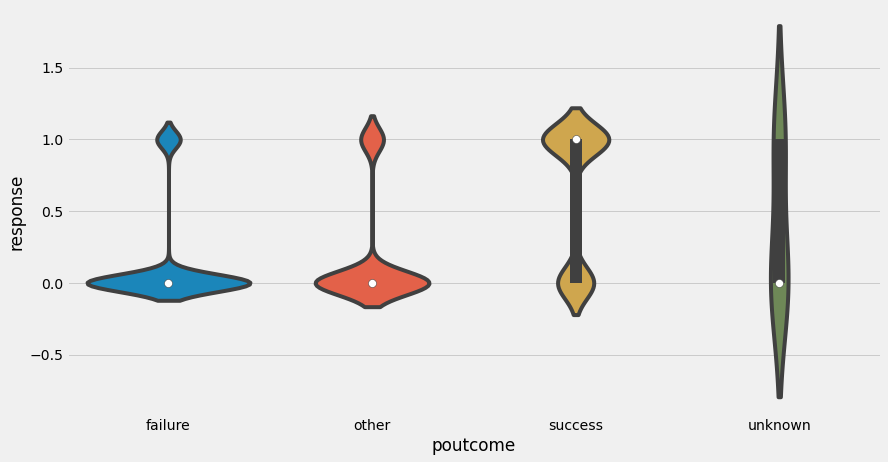

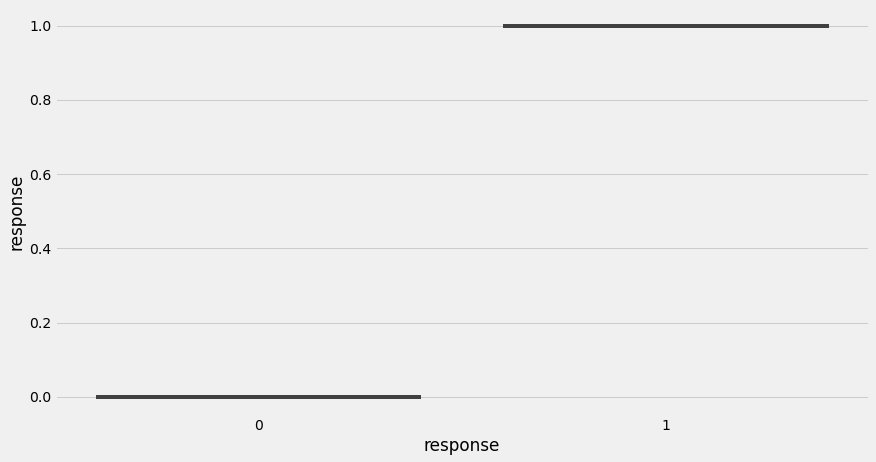

In [206]:
for i in cat_feature:
    plt.figure(figsize=(13,7))
    plt.style.use('fivethirtyeight')
    sns.violinplot(df1[i],df1['response']);

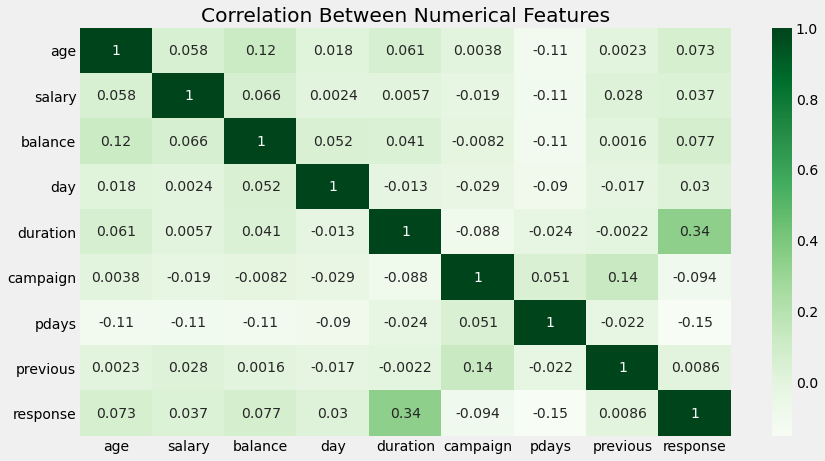

In [207]:
plt.figure(figsize=(13,7))
plt.style.use('fivethirtyeight')
sns.heatmap(df1.corr(),annot=True,cmap='Greens')
plt.title("Correlation Between Numerical Features");

-> We can see there is stromg positive correlation between response i.e target & duration means duration highly affect on          target

In [208]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1


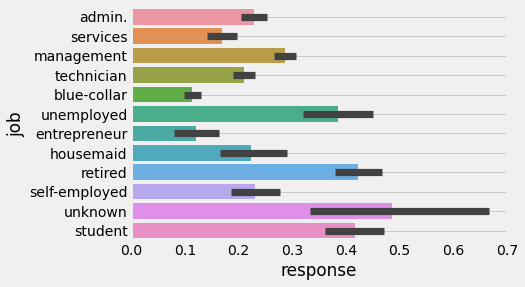

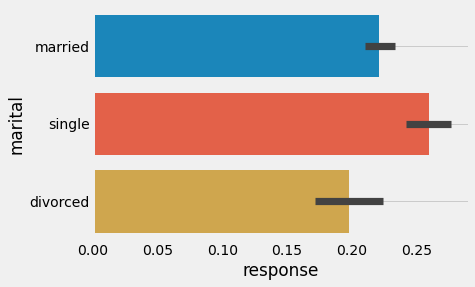

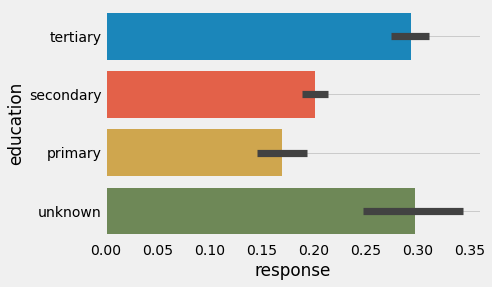

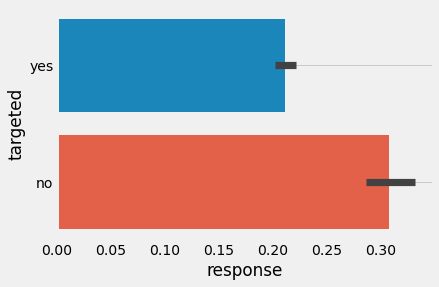

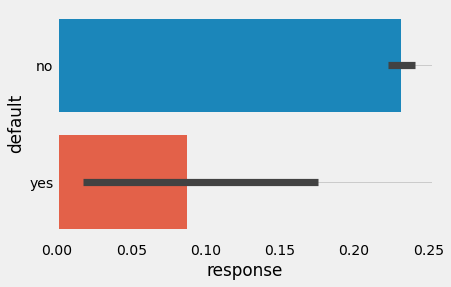

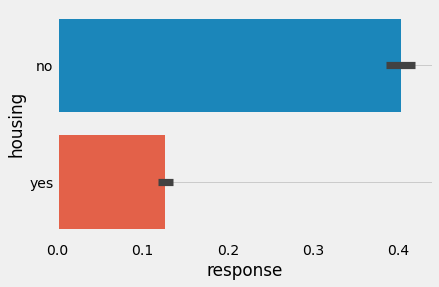

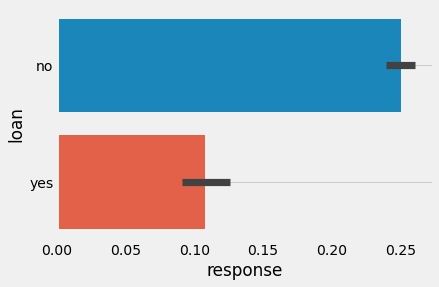

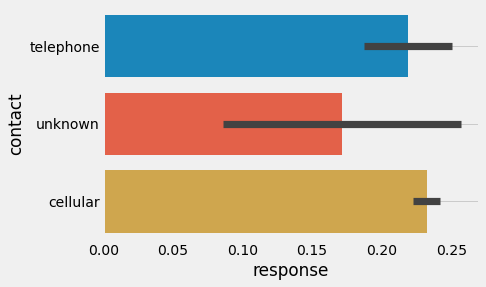

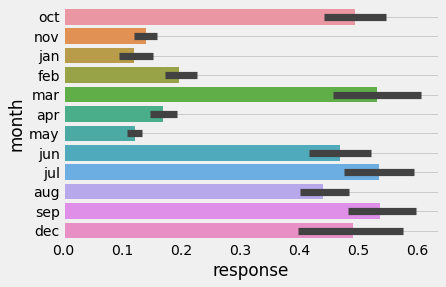

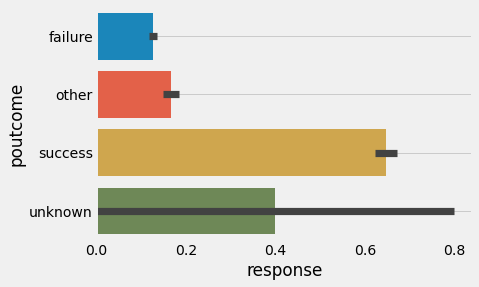

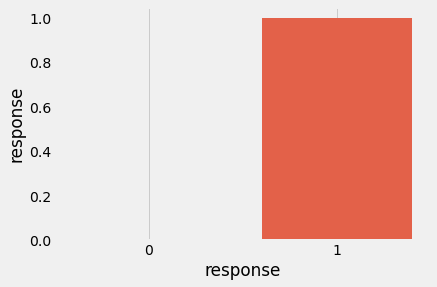

In [209]:
for i in cat_feature:
    sns.barplot(df1['response'],df1[i])
    plt.grid()
    plt.show();

### Age-Wise Response

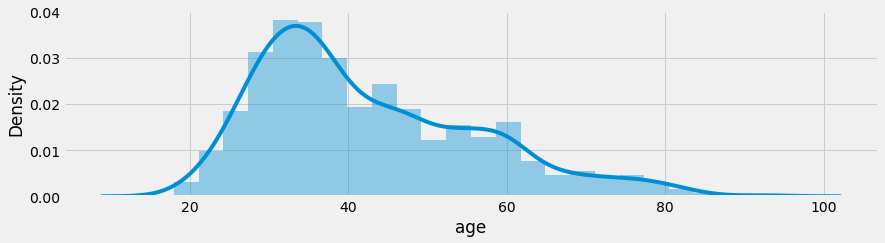

In [210]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df1[df1['response']==1].age);

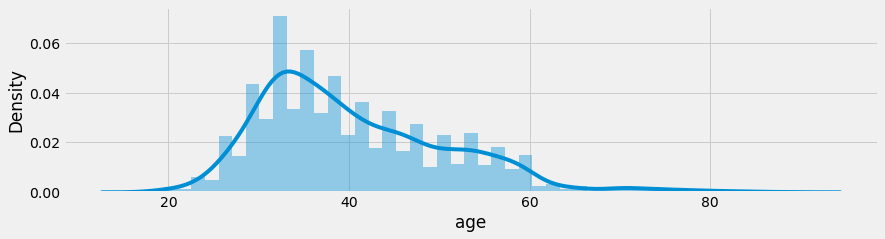

In [211]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df1[df1['response']==0].age);

### Are pdays and poutcome associated with the target?  

-> poutcome is the past data output so we dont think it affect the target

In [212]:
df1.drop('poutcome',axis=1)

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,20000,single,secondary,yes,no,1475,yes,no,cellular,16,nov,1166,3,530,12,0
45201,53,management,100000,married,tertiary,yes,no,583,no,no,cellular,17,nov,226,1,184,4,1
45204,73,retired,55000,married,secondary,yes,no,2850,no,no,cellular,17,nov,300,1,40,8,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,1


In [213]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: pdays, Length: 559, dtype: int64

In [214]:
df['previous'].value_counts().head()

0    36954
1     2772
2     2106
3     1142
4      714
Name: previous, dtype: int64

### how do you handle the pdays column with a value of -1 where the previous campaign data is missing?

-> No of days cannot be in negative so we can remove them

### Label Encoding of Categorical Variables.

In [215]:
from sklearn.preprocessing import LabelEncoder

In [216]:
df2 = df1[cat_feature].apply(LabelEncoder().fit_transform)

In [217]:
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
24060,0,1,2,1,0,0,0,1,10,0,0
24062,0,2,1,1,0,1,1,1,10,1,1
24064,7,1,1,1,0,1,0,1,10,0,1
24072,4,1,2,1,0,1,0,1,10,1,0
24077,4,1,2,1,0,1,0,1,10,0,1


In [218]:
df3 = df2.join(df[num_feature])

In [219]:
df3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,1,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,0,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,1,36,100000,0,23,140,1,143,3


In [220]:
df3.shape

(8257, 19)

In [221]:
df.shape

(45211, 19)

### Train Test Split

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [223]:
X = df3.drop('response',axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [224]:
Y=df3[['response']]
Y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


In [225]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=1)

### Model Building
### Logistic Regression

In [226]:
LR=LogisticRegression()

In [227]:
LR

LogisticRegression()

In [228]:
LR.fit(X_train,Y_train)

LogisticRegression()

In [229]:
cv_score= cross_val_score(LR,X_train,Y_train, cv=5)
np.mean(cv_score)

0.7772899318697956

In [230]:
Y_pred=LR.predict(X_test)

In [231]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1294
           1       0.56      0.20      0.29       358

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.58      1652
weighted avg       0.76      0.79      0.75      1652



In [232]:
f1_score(Y_pred,Y_test)

0.29045643153526973

In [233]:
confusion_matrix(Y_pred,Y_test)

array([[1240,  288],
       [  54,   70]], dtype=int64)

### RFE

In [234]:
from sklearn.feature_selection import RFE
rfe=RFE(LR,5)
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [235]:
rfe.support_

array([False, False, False,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [236]:
X_train.columns[rfe.support_]

Index(['targeted', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [237]:
col=X_train.columns[rfe.support_]

In [238]:
LR.fit(X_train[col],Y_train)

LogisticRegression()

In [239]:
Y_Pred2 = LR.predict(X_test[col])

In [240]:
Y_Pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [241]:
print(classification_report(Y_Pred2,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1461
           1       0.39      0.73      0.51       191

    accuracy                           0.84      1652
   macro avg       0.68      0.79      0.71      1652
weighted avg       0.89      0.84      0.86      1652



In [242]:
f1_score(Y_Pred2,Y_test)

0.5100182149362477

In [243]:
confusion_matrix(Y_Pred2,Y_test)

array([[1243,  218],
       [  51,  140]], dtype=int64)

### Use Statmodel

In [244]:
import statsmodels.api as sm

In [245]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
44701,5,0,0,1,0,0,0,1,11,1,84,55000,1680,6,113,5,97,3
43668,6,1,2,1,0,0,0,0,8,0,43,60000,10072,12,98,1,77,5
35514,1,1,0,1,0,1,0,0,8,0,53,20000,2144,7,217,2,342,1
24253,0,1,1,1,0,1,0,0,9,0,39,50000,401,17,396,1,129,2
35448,4,2,2,0,0,1,0,0,8,0,31,100000,0,7,45,1,22,2


In [246]:
X_train_sm=sm.add_constant(X_train[col])

In [247]:
X_train_sm.head()

,const,targeted,housing,loan,contact,poutcome
44701,1.0,1,0,0,1,1
43668,1.0,1,0,0,0,0
35514,1.0,1,1,0,0,0
24253,1.0,1,1,0,0,0
35448,1.0,0,1,0,0,0


In [248]:
LR1 = sm.OLS(Y_train, X_train_sm).fit()

In [249]:
LR1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     375.7
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:02:30   Log-Likelihood:                -2869.9
No. Observations:                6605   AIC:                             5752.
Df Residuals:                    6599   BIC:                             5793.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2805      0.013     21.529      0.000       0.255       0.306
targeted      -0.0427      0.012     -3.680      0.000      -0.065      -0.020
housing       -0.1791      0.010    -17.966      0.000      -0.199      -0.160
loan          -0.0665      0.014     -4.885      0.000      -0.093      -0.040
contact       -0.0560      0.014     -3.866      0.000      -0.084      -0.028
poutcome       0.1891      0.006     30.876      0.000       0.177       0.201
==============================================================================
Omnibus:                      735.062   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1002.678
Skew:                           0.944   Prob(JB):                    1.87e-218
Kurtosis:                       3.274   Cond. No.                         5.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [250]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [251]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.915654
3,targeted,6.539455
2,education,6.533275
11,salary,5.401943
16,pdays,5.241166
1,marital,4.318085
13,day,4.098138
8,month,3.622587
5,housing,3.111419
0,job,2.868584


####  Build Model

In [252]:
F_col = ['education', 'job', 'poutcome', 'marital', 'month','targeted', 'housing', 'salary','day','duration','age']

In [253]:
log = sm.GLM(Y_train,(sm.add_constant(X_train[F_col])), family = sm.families.Binomial())

In [254]:
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                 6605
Model:                            GLM   Df Residuals:                     6593
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2580.9
Date:                Fri, 10 Sep 2021   Deviance:                       5161.7
Time:                        15:02:31   Pearson chi2:                 6.85e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0476      0.296    -10.285      0.000      -3.628      -2.467
education      0.1900      0.068      2.799      0.005       0.057       0.323
job            0.0141      0.011      1.262      0.207      -0.008       0.036
poutcome       1.0559      0.042     24.927      0.000       0.973       1.139
marital        0.1397      0.067      2.082      0.037       0.008       0.271
month          0.0084      0.010      0.834      0.404      -0.011       0.028
targeted      -0.0576      0.113     -0.509      0.611      -0.279       0.164
housing       -1.1663      0.075    -15.588      0.000      -1.313      -1.020
salary      4.435e-07   1.21e-06      0.366      0.714   -1.93e-06    2.82e-06
day            0.0024      0.004      0.557      0.577      -0.006       0.011
duration       0.0035      0.000     22.417      0.000       0.003       0.004
age            0.0021      0.003      0.645      0.519      -0.004       0.009
==============================================================================
"""

In [255]:
LR.fit(X_train[F_col],Y_train)

LogisticRegression()

In [256]:
LR.classes_

array([0, 1], dtype=int64)

In [257]:
LR.coef_

array([[ 6.11777840e-03,  1.05096245e-02,  1.65742310e-01,
        -3.94977008e-02, -1.37997690e-01, -4.35882815e-02,
        -1.12809605e-01, -2.80720619e-06, -6.78964236e-03,
         2.74803531e-03, -2.12541309e-02]])

In [258]:
predf = LR.predict(X_test[F_col])

In [259]:
def LR_matric():    
    print('Report:\n',classification_report(Y_test,predf ))
    print("F1 Score:",f1_score(predf,Y_test))
    print('confusion Matrix:\n',confusion_matrix(predf,Y_test))
    print('kfold cross validation:\n',cross_val_score(LR, X, Y, cv=5))

In [260]:
LR_matric()

Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1294
           1       0.55      0.20      0.29       358

    accuracy                           0.79      1652
   macro avg       0.68      0.58      0.59      1652
weighted avg       0.75      0.79      0.75      1652

F1 Score: 0.2938775510204082
confusion Matrix:
 [[1234  286]
 [  60   72]]
kfold cross validation:
 [0.79539952 0.72215496 0.77892187 0.7752877  0.75529982]


### Random Forest

In [261]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
RFC = RandomForestClassifier(max_depth=5,random_state=0,max_leaf_nodes=50)

In [263]:
RFC

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [264]:
RFC.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [265]:
cv1_score= cross_val_score(RFC,X_train,Y_train, cv=5)
np.mean(cv1_score)

0.838001514004542

In [266]:
y_pred= RFC.predict(X_test)

In [267]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [268]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1294
           1       0.79      0.42      0.54       358

    accuracy                           0.85      1652
   macro avg       0.82      0.69      0.73      1652
weighted avg       0.84      0.85      0.83      1652



In [269]:
f1_score(Y_test,y_pred)

0.5447897623400365

In [270]:
confusion_matrix(Y_test,y_pred)

array([[1254,   40],
       [ 209,  149]], dtype=int64)

In [271]:
from sklearn.metrics import roc_auc_score

In [272]:
roc_auc_score(Y_test,y_pred)

0.6926446081182596

### RFE

In [273]:
rfe1 = RFE(RFC, 5)
rfe1.fit(X_train,Y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=0),
    n_features_to_select=5)

In [274]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [275]:
X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [276]:
cols = X_train.columns[rfe1.support_]

In [277]:
RFC.fit(X_train[cols],Y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=0)

In [278]:
y_pred3 = RFC.predict(X_test[cols])

In [279]:
f1_score(y_pred3,Y_test)

0.5993265993265994

In [280]:
confusion_matrix(y_pred3,Y_test)

array([[1236,  180],
       [  58,  178]], dtype=int64)

In [281]:
print(classification_report(y_pred3, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1416
           1       0.50      0.75      0.60       236

    accuracy                           0.86      1652
   macro avg       0.73      0.81      0.76      1652
weighted avg       0.89      0.86      0.87      1652



In [282]:
roc_auc_score(Y_test,y_pred3)

0.7261922236709177

-> Housing, month, pdays, poutcome, duration are imp feature as per RANDOM FOREST algorithm.

-> targeted,housing,loan,contact,poutcome this are importent feature according to logistic regression
